## YELP Dataset

In [1]:
import pandas as pd

In [2]:
xls = pd.ExcelFile('yelp.xlsx')
df = xls.parse('yelp_data')

In [3]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1


## Joining data

In [4]:
df_cities = xls.parse('cities')

In [5]:
df_cities.head()

,id,city
0,1,Bellevue
1,2,Braddock
2,3,Carnegie
3,4,Homestead
4,5,Mc Kees Rocks


In [6]:
df = pd.merge(left=df, right=df_cities, how='inner', left_on='city_id', right_on='id')

In [7]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id,city
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue


In [8]:
df_states = xls.parse('states')

In [9]:
df_states.head()

,id,state
0,1,PA
1,2,NV


In [10]:
df = pd.merge(left=df, right=df_states, how='inner', left_on='state_id', right_on='id')

In [11]:
df.shape

(600, 12)

In [12]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue,1,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue,1,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue,1,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue,1,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue,1,PA


In [13]:
atts = ['name', 'city', 'state']
df[atts].head(100)

,name,city,state
0,China Sea Chinese Restaurant,Bellevue,PA
1,Discount Tire Center,Bellevue,PA
2,Frankfurters,Bellevue,PA
3,Fred Dietz Floral,Bellevue,PA
4,Kuhn's Market,Bellevue,PA
...,...,...,...
95,Aamco Transmissions,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Pittsburgh,PA
97,Aracri's Greentree Inn,Pittsburgh,PA
98,Atch-Mont Real Estate,Pittsburgh,PA


In [14]:
del df['id_x']

In [15]:
del df['id_y']

In [16]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA


## Slicing rows

In [17]:
df[100:200]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
100,Au Bon Pain Co,Food,Bakeries,False,7,3.0,8,1,Pittsburgh,PA
101,Bado's Pizza Grill and Ale House,Italian,Bars,True,93,3.5,8,1,Pittsburgh,PA
102,Bastone Auto Service,Auto Repair,Automotive,False,20,4.0,8,1,Pittsburgh,PA
103,Bellisario's Pizza Palace,Italian,Pizza,True,21,3.5,8,1,Pittsburgh,PA
104,Benedum Center for the Performing Arts,Opera & Ballet,Arts & Entertainment,False,56,4.5,8,1,Pittsburgh,PA
...,...,...,...,...,...,...,...,...,...,...
195,McDonald's,Burgers,Fast Food,True,5,2.0,8,1,Pittsburgh,PA
196,Miller Ace Hardware,Shopping,Hardware Stores,False,5,4.5,8,1,Pittsburgh,PA
197,Minutello's Restaurant & Lounge,Italian,Pizza,True,8,3.0,8,1,Pittsburgh,PA
198,Monro Muffler Brake & Service,Tires,Automotive,False,9,2.0,8,1,Pittsburgh,PA


In [18]:
index = len(df) - 1
last_business = df[index:] #get a slice from provided start index all the way to end of dataframe
last_business['name']

599    A Sunrise Towing
Name: name, dtype: object

In [19]:
df[-1:]['name']

599    A Sunrise Towing
Name: name, dtype: object

## Querying data using boolean indexing

In [20]:
pitts = df['city'] == 'Pittsburgh'

In [21]:
type(pitts)

pandas.core.series.Series

In [22]:
pitts

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Name: city, Length: 600, dtype: bool

In [23]:
df[pitts]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA
...,...,...,...,...,...,...,...,...,...,...
283,Walter's Automotive,Auto Repair,Automotive,False,99,5.0,8,1,Pittsburgh,PA
284,Washington's Landing Marina,Active Life,Boating,False,3,3.0,8,1,Pittsburgh,PA
285,West Liberty Cycles,Sporting Goods,Bikes,False,8,4.5,8,1,Pittsburgh,PA
286,Wiseguys Pizza,Restaurants,Pizza,True,12,3.0,8,1,Pittsburgh,PA


In [24]:
rest = df['name'] == 'The Dragon Chinese Cuisine'
df[rest]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
93,The Dragon Chinese Cuisine,Restaurants,Chinese,True,7,3.0,7,1,Munhall,PA


In [25]:
df[rest]['take_out']

93    True
Name: take_out, dtype: bool

In [26]:
cat_0_bars = df["category_0"] == "Bars"
cat_1_bars = df["category_1"] == "Bars"
df[cat_0_bars | cat_1_bars]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
12,Emil's Lounge,Bars,American (New),True,26,4.5,2,1,Braddock,PA
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA
42,Duke's Upper Deck Cafe,Pubs,Bars,True,33,3.5,4,1,Homestead,PA
62,Randy's Beer Barrel Pub,Pubs,Bars,False,3,2.5,4,1,Homestead,PA
70,TGI Fridays,Bars,American (Traditional),True,23,2.5,4,1,Homestead,PA
77,Applebee's,Bars,American (Traditional),True,9,3.5,5,1,Mc Kees Rocks,PA
101,Bado's Pizza Grill and Ale House,Italian,Bars,True,93,3.5,8,1,Pittsburgh,PA
114,Buffalo Blues,Restaurants,Bars,True,62,3.0,8,1,Pittsburgh,PA
119,Cappy's Cafe,Bars,American (Traditional),True,51,3.0,8,1,Pittsburgh,PA


In [27]:
cat_0_bars = df["category_0"] == "Bars"
cat_1_bars = df["category_1"] == "Bars"
carnegie = df["city"] == "Carnegie"
df[(cat_0_bars | cat_1_bars) & carnegie]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA


In [28]:
cat_0 = df["category_0"].isin(["Bars", "Restaurants"])
cat_1 = df["category_1"].isin(["Bars", "Restaurants"])
carnegie = df["city"] == "Carnegie"
df[(cat_0 | cat_1) & carnegie]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
18,Barb's Country Junction Cafe,Restaurants,Cafes,True,9,4.0,3,1,Carnegie,PA
20,Don Don Chinese Restaurant,Restaurants,Chinese,True,10,2.5,3,1,Carnegie,PA
29,Papa J's,Restaurants,Italian,True,81,3.5,3,1,Carnegie,PA
30,Porto Fino Pizzaria & Gyro,Restaurants,Pizza,False,4,2.5,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA


In [29]:
lv = df["city"] == "Las Vegas"
cat_0_bars = df["category_0"] == "Dive Bars"
cat_1_bars = df["category_1"] == "Dive Bars"
divebars_lv = df[lv &(cat_0_bars | cat_1_bars)]

In [30]:
len(divebars_lv)

3

In [31]:
stars = divebars_lv["stars"] >= 4.0
divebars_lv_4star_rating = divebars_lv[stars]

In [32]:
divebars_lv_4star_rating

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
451,Huntridge Tavern,Dive Bars,Bars,False,50,4.0,12,2,Las Vegas,NV
453,Moon Doggies,Dive Bars,Bars,False,85,4.0,12,2,Las Vegas,NV


In [33]:
import random

In [34]:
rand_int = random.randint(0, len(divebars_lv_4star_rating) - 1)
rand_divebar = divebars_lv_4star_rating[rand_int : rand_int + 1]
rand_divebar

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
451,Huntridge Tavern,Dive Bars,Bars,False,50,4.0,12,2,Las Vegas,NV


In [35]:
rand_int = random.randint(0, len(divebars_lv_4star_rating) - 1)
rand_divebar = divebars_lv_4star_rating.iloc[rand_int]
rand_divebar

name            Huntridge Tavern
category_0             Dive Bars
category_1                  Bars
take_out                   False
review_count                  50
stars                          4
city_id                       12
state_id                       2
city                   Las Vegas
state                         NV
Name: 451, dtype: object

## Updating & creating data

In [36]:
df["rating"] = df["stars"] * 2

In [37]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,5.0
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,9.0
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,9.0
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,8.0
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,7.0


In [38]:
def convert_to_rating(x):
    return (str(x) + " out of 10")

In [39]:
df["rating"] = df["rating"].apply(convert_to_rating)

In [40]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,5.0 out of 10
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,9.0 out of 10
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,9.0 out of 10
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,8.0 out of 10
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,7.0 out of 10


In [41]:
bars_rest = df["category_0"].isin(["Bars", "Restaurants"])
df_bars_rest = df[bars_rest]
df_bars_rest

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,5.0 out of 10
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,9.0 out of 10
6,Luigi's Pizzeria,Restaurants,Pizza,True,18,4.0,1,1,Bellevue,PA,8.0 out of 10
8,R & B's Pizza Place,Restaurants,Pizza,True,17,4.0,1,1,Bellevue,PA,8.0 out of 10
9,Rusty Nail,Restaurants,American (Traditional),True,32,3.5,1,1,Bellevue,PA,7.0 out of 10
...,...,...,...,...,...,...,...,...,...,...,...
537,Pho So 1,Restaurants,Vietnamese,True,763,3.5,12,2,Las Vegas,NV,7.0 out of 10
538,Rice To-Go,Restaurants,Chinese,True,19,3.0,12,2,Las Vegas,NV,6.0 out of 10
539,Wienerschnitzel,Restaurants,Fast Food,False,3,1.0,12,2,Las Vegas,NV,2.0 out of 10
593,Sporting Chance Saloon,Bars,Nightlife,False,7,3.5,13,2,North Las Vegas,NV,7.0 out of 10


## Pivot tables

In [42]:
pivot_state_cat = pd.pivot_table(df_bars_rest, index = ["state", "city", "category_0"])

In [43]:
pivot_state_cat[["review_count", "stars"]]

review_count     stars
state city            category_0                         
NV    Henderson       Bars           171.000000  3.000000
                      Restaurants    102.454545  3.181818
      Las Vegas       Bars            15.500000  4.000000
                      Restaurants    221.153846  3.153846
      North Las Vegas Bars             7.000000  3.500000
                      Restaurants     12.000000  3.000000
PA    Bellevue        Restaurants     14.000000  3.916667
      Braddock        Bars            26.000000  4.500000
      Carnegie        Bars            16.500000  4.000000
                      Restaurants     26.000000  3.125000
      Homestead       Bars            23.000000  2.500000
                      Restaurants      6.000000  2.500000
      Mc Kees Rocks   Bars             9.000000  3.500000
                      Restaurants      7.333333  3.333333
      Munhall         Restaurants      9.500000  3.500000
      Pittsburgh      Bars            20.000000  3.416667
                      Restaurants     67.000000  3.203704
      West Homestead  Bars            92.000000  2.500000
      West Mifflin    Restaurants      5.000000  4.333333

## Histograms

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df_pitt = df[df["city"] == "Pittsburgh"]

In [46]:
df_pitt.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA,9.0 out of 10
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA,8.0 out of 10
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA,7.0 out of 10
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA,4.0 out of 10
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA,6.0 out of 10


In [47]:
df_vegas = df[df["city"] == "Las Vegas"]

In [48]:
df_vegas.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
430,Reliable Tax Services,Financial Services,Accountants,False,3,4.5,12,2,Las Vegas,NV,9.0 out of 10
431,Paradise Electro Stimulations,Shopping,Adult,False,4,4.5,12,2,Las Vegas,NV,9.0 out of 10
432,The Studio,Shopping,Adult,False,7,5.0,12,2,Las Vegas,NV,10.0 out of 10
433,Boomer's Bar,Bars,American (Traditional),False,19,3.5,12,2,Las Vegas,NV,7.0 out of 10
434,Omelet House,Breakfast & Brunch,American (Traditional),True,703,4.5,12,2,Las Vegas,NV,9.0 out of 10


In [49]:
pitt_stars = df_pitt["stars"]
vegas_stars = df_vegas["stars"]
vegas_stars.head()

430    4.5
431    4.5
432    5.0
433    3.5
434    4.5
Name: stars, dtype: float64

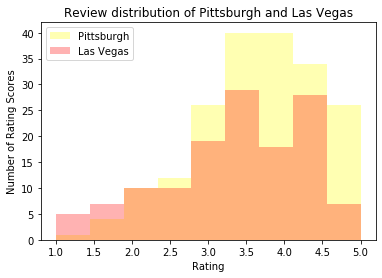

In [50]:
plt.hist(
    pitt_stars,
    alpha = 0.3,
    color = 'yellow',
    label = 'Pittsburgh',
    bins = 'auto'
)

plt.hist(
    vegas_stars,
    alpha = 0.3,
    color = 'red',
    label = 'Las Vegas',
    bins = 'auto'
)

plt.xlabel("Rating")
plt.ylabel("Number of Rating Scores")

plt.legend(loc = 'best')

plt.title("Review distribution of Pittsburgh and Las Vegas")

plt.show()

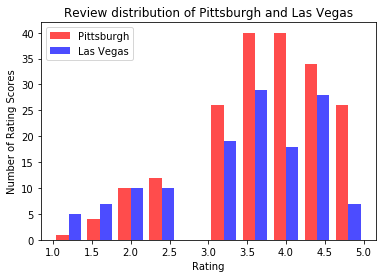

In [51]:
plt.hist(
    [pitt_stars, vegas_stars],
    alpha = 0.7,
    color = ['red', 'blue'],
    label = ['Pittsburgh', 'Las Vegas'],
    bins = 'auto'
)

plt.xlabel('Rating')
plt.ylabel('Number of Rating Scores')

plt.legend(loc = 'best')

plt.title('Review distribution of Pittsburgh and Las Vegas')

plt.show()

## Scatterplots

In [52]:
df_health = df[df["category_0"] == "Health & Medical"]
df_fast = df[df["category_0"] == "Fast Food"]
df_break = df[df["category_0"] == "Breakfast & Brunch"]
df_break.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
24,Gab & Eat,Breakfast & Brunch,Sandwiches,True,69,4.5,3,1,Carnegie,PA,9.0 out of 10
131,Crepes Parisiennes,Breakfast & Brunch,Creperies,True,73,4.0,8,1,Pittsburgh,PA,8.0 out of 10
240,Ritters Diner,Breakfast & Brunch,American (Traditional),True,146,3.5,8,1,Pittsburgh,PA,7.0 out of 10
266,The Bloomfield Sandwich Shop,Breakfast & Brunch,Sandwiches,True,41,4.0,8,1,Pittsburgh,PA,8.0 out of 10
268,The Dor-Stop Restaurant,Breakfast & Brunch,Diners,True,275,4.5,8,1,Pittsburgh,PA,9.0 out of 10


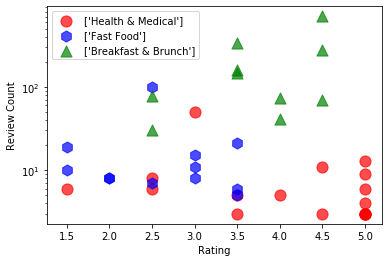

In [53]:
plt.scatter(
    df_health["stars"], df_health["review_count"],
    marker = "o",
    color = 'r',
    alpha = 0.7,
    s = 124,
    label = ['Health & Medical']
)

plt.scatter(
    df_fast["stars"], df_fast["review_count"],
    marker = "h",
    color = 'b',
    alpha = 0.7,
    s = 124,
    label = ['Fast Food']
)

plt.scatter(
    df_break["stars"], df_break["review_count"],
    marker = "^",
    color = 'g',
    alpha = 0.7,
    s = 124,
    label = ['Breakfast & Brunch']
)

plt.xlabel('Rating')
plt.ylabel('Review Count')

plt.legend(loc = 'upper left')

axes = plt.gca()
axes.set_yscale('log')

plt.show()


